In [1]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("BDM_p2\covid_19_india.csv",parse_dates=["Date"])

In [11]:
df.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [12]:
import sqlite3

In [13]:
conn = sqlite3.connect("covid19_db.db")

In [15]:
df.to_sql('india_covid_tbl', conn)

In [18]:
q1 = 'Select * from india_covid_tbl where State = "Delhi" '

In [19]:
df2 = pd.read_sql(q1, conn)

In [20]:
df2.head()

,index,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,34,35,2020-02-03 00:00:00,6:00 PM,Delhi,1,0,0,0,1
1,38,39,2020-03-03 00:00:00,6:00 PM,Delhi,1,0,0,0,1
2,42,43,2020-04-03 00:00:00,6:00 PM,Delhi,1,0,0,0,1
3,45,46,2020-05-03 00:00:00,6:00 PM,Delhi,2,0,0,0,2
4,51,52,2020-06-03 00:00:00,6:00 PM,Delhi,3,0,0,0,3


In [21]:
abc = df2.to_csv("delhi_cases.csv")

In [22]:
df3 = pd.read_csv("delhi_cases.csv",parse_dates=["Date"])

In [23]:
df3.head()

,Unnamed: 0,index,Sno,Date_,Time,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Unnamed: 12,Eight,Ten,Twelve,Fourteen,Sixteen
0,0,34,35,03-02-2020 00:00,6:00 PM,2020-02-03,Delhi,1,0,0,0,1,NaN,0.0,0.0,1.0,1.0,1.0
1,1,38,39,03-03-2020 00:00,6:00 PM,2020-03-03,Delhi,1,0,0,0,1,NaN,0.0,0.0,1.0,1.0,1.0
2,2,42,43,03-04-2020 00:00,6:00 PM,2020-04-03,Delhi,1,0,0,0,1,NaN,0.0,1.0,1.0,1.0,1.0
3,3,45,46,03-05-2020 00:00,6:00 PM,2020-05-03,Delhi,2,0,0,0,2,NaN,0.0,1.0,1.0,1.0,1.0
4,4,51,52,03-06-2020 00:00,6:00 PM,2020-06-03,Delhi,3,0,0,0,3,NaN,1.0,1.0,1.0,1.0,1.0


In [24]:
corr_eight_df = pd.DataFrame(df3, columns=['Date','Confirmed','Eight'])

In [25]:
corr_eight_df.head()

,Date,Confirmed,Eight
0,2020-02-03,1,0.0
1,2020-03-03,1,0.0
2,2020-04-03,1,0.0
3,2020-05-03,2,0.0
4,2020-06-03,3,1.0


In [27]:
corr_eight_df.dropna()

,Date,Confirmed,Eight
0,2020-02-03,1,0.0
1,2020-03-03,1,0.0
2,2020-04-03,1,0.0
3,2020-05-03,2,0.0
4,2020-06-03,3,1.0
...,...,...,...
123,2020-03-07,92175,3300.0
124,2020-04-07,94695,3334.0
125,2020-05-07,97200,3371.0
126,2020-06-07,99444,3411.0


In [31]:
corr_eight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       136 non-null    datetime64[ns]
 1   Confirmed  136 non-null    float64       
 2   Eight      128 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.3 KB


In [30]:
corr_eight_df["Confirmed"]=corr_eight_df["Confirmed"].astype("float64")

In [32]:
import scipy.stats as stats

In [41]:
corr_eight_df.dropna()
overall_pearson_r = corr_eight_df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

Pandas computed Pearson r: 0.9790837201209409


In [42]:
pearsonr_x = corr_eight_df["Confirmed"]

In [43]:
pearsonr_y = corr_eight_df["Eight"]

In [44]:
import scipy.stats

In [46]:
np.nan_to_num(corr_eight_df)

array([[Timestamp('2020-02-03 00:00:00'), 1.0, 0.0],
       [Timestamp('2020-03-03 00:00:00'), 1.0, 0.0],
       [Timestamp('2020-04-03 00:00:00'), 1.0, 0.0],
       [Timestamp('2020-05-03 00:00:00'), 2.0, 0.0],
       [Timestamp('2020-06-03 00:00:00'), 3.0, 1.0],
       [Timestamp('2020-07-03 00:00:00'), 3.0, 1.0],
       [Timestamp('2020-08-03 00:00:00'), 3.0, 1.0],
       [Timestamp('2020-09-03 00:00:00'), 4.0, 1.0],
       [Timestamp('2020-10-03 00:00:00'), 4.0, 1.0],
       [Timestamp('2020-11-03 00:00:00'), 5.0, 1.0],
       [Timestamp('2020-12-03 00:00:00'), 6.0, 1.0],
       [Timestamp('2020-03-13 00:00:00'), 6.0, 1.0],
       [Timestamp('2020-03-14 00:00:00'), 7.0, 1.0],
       [Timestamp('2020-03-15 00:00:00'), 7.0, 1.0],
       [Timestamp('2020-03-16 00:00:00'), 7.0, 1.0],
       [Timestamp('2020-03-17 00:00:00'), 8.0, 1.0],
       [Timestamp('2020-03-18 00:00:00'), 10.0, 1.0],
       [Timestamp('2020-03-19 00:00:00'), 12.0, 1.0],
       [Timestamp('2020-03-20 00:00:00'), 17

In [53]:
df_droppednan_8 = corr_eight_df.dropna()

In [55]:
df_droppednan_8.tail()

,Date,Confirmed,Eight
123,2020-03-07,92175.0,3300.0
124,2020-04-07,94695.0,3334.0
125,2020-05-07,97200.0,3371.0
126,2020-06-07,99444.0,3411.0
127,2020-07-07,100823.0,3446.0


In [56]:
pearsonr_x = df_droppednan_8["Confirmed"]

In [57]:
pearsonr_y = df_droppednan_8["Eight"]

In [58]:
scipy.stats.pearsonr(pearsonr_x, pearsonr_y)

(0.979083720120941, 5.341821330828636e-89)

In [59]:
scipy.stats.spearmanr(pearsonr_x, pearsonr_y)

SpearmanrResult(correlation=0.9991354953208536, pvalue=6.617078507466029e-176)

In [60]:
scipy.stats.kendalltau(pearsonr_x, pearsonr_y) 

KendalltauResult(correlation=0.9917675639790726, pvalue=7.187953782367176e-61)

In [62]:
result = scipy.stats.linregress(pearsonr_x, pearsonr_y)
result.slope

0.03949565308147956

In [63]:
result.intercept


31.620188041350502

In [64]:
result.rvalue


0.9790837201209409

In [65]:
result.pvalue


5.341821330830411e-89

In [66]:
result.stderr

0.0007311702341604438

In [67]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [68]:
line = f'Regression line: y={result.intercept:.2f}+{result.slope:.2f}x, r={result.rvalue:.2f}'

In [69]:
line

'Regression line: y=31.62+0.04x, r=0.98'

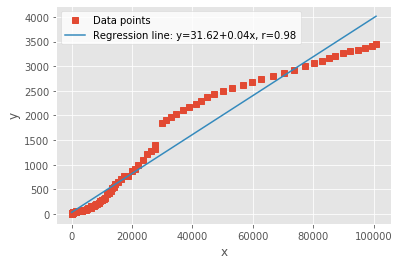

In [70]:
fig, ax = plt.subplots()
ax.plot(pearsonr_x, pearsonr_y, linewidth=0, marker='s', label='Data points')
ax.plot(pearsonr_x, result.intercept + result.slope * pearsonr_x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()